In [33]:
import numpy as np
import pandas as pd
import pylab as plt
from sklearn.cluster import KMeans
from scipy.stats import sem
from tqdm import tqdm
import matplotlib.ticker as ticker
import os
import re
from matplotlib import rc
rc('font', **{'family': 'serif', 'serif': ['Computer Modern'], 'weight': 'bold'})
rc('text', usetex=True)

In [34]:
input_path = 'results'

In [36]:
match_number = re.compile('-?\ *[0-9]+\.?[0-9]*(?:[Ee]\ *-?\ *[0-9]+)?')

# regret value plot

Case 1: truncated error tensor

In [87]:
n_best = 1

In [88]:
regrets_ed_incremental_increase_runtime_limit = <result_1>
regrets_ed_incremental_greedy_increase_runtime_limit = <result_2>
regrets_ed_incremental_greedy_increase_runtime_limit_with_variance = <result_3>

In [89]:
regrets_ed_incremental_increase_runtime_limit_mean = []
regrets_ed_incremental_increase_runtime_limit_std = []
regrets_ed_incremental_increase_runtime_limit_ste = []

regrets_ed_incremental_greedy_increase_runtime_limit_mean = []
regrets_ed_incremental_greedy_increase_runtime_limit_std = []
regrets_ed_incremental_greedy_increase_runtime_limit_ste = []

regrets_ed_incremental_greedy_increase_runtime_limit_with_variance_mean = []
regrets_ed_incremental_greedy_increase_runtime_limit_with_variance_std = []
regrets_ed_incremental_greedy_increase_runtime_limit_with_variance_ste = [] 

runtime_limits_to_plot = []

initial_round = True

for item in regrets_ed_incremental_increase_runtime_limit.columns:

    ed_single_runtime_limit = np.array(regrets_ed_incremental_increase_runtime_limit.loc[:, item])
    regrets_ed_incremental_increase_runtime_limit_mean.append(np.mean(ed_single_runtime_limit))
    regrets_ed_incremental_increase_runtime_limit_std.append(np.std(ed_single_runtime_limit))
    regrets_ed_incremental_increase_runtime_limit_ste.append(sem(ed_single_runtime_limit, axis=0, ddof=0))

    ed_greedy_single_runtime_limit = np.array(regrets_ed_incremental_greedy_increase_runtime_limit.loc[:, item])
    regrets_ed_incremental_greedy_increase_runtime_limit_mean.append(np.mean(ed_greedy_single_runtime_limit))
    regrets_ed_incremental_greedy_increase_runtime_limit_std.append(np.std(ed_greedy_single_runtime_limit))
    regrets_ed_incremental_greedy_increase_runtime_limit_ste.append(sem(ed_greedy_single_runtime_limit, axis=0, ddof=0))

    ed_greedy_single_runtime_limit_with_variance = np.array(regrets_ed_incremental_greedy_increase_runtime_limit_with_variance.loc[:, item])
    regrets_ed_incremental_greedy_increase_runtime_limit_with_variance_mean.append(np.mean(ed_greedy_single_runtime_limit_with_variance))
    regrets_ed_incremental_greedy_increase_runtime_limit_with_variance_std.append(np.std(ed_greedy_single_runtime_limit_with_variance))
    regrets_ed_incremental_greedy_increase_runtime_limit_with_variance_ste.append(sem(ed_greedy_single_runtime_limit_with_variance, axis=0, ddof=0))

    runtime_limit_ratio = float(re.findall("\d+\.\d+", item)[0])

    runtime_limits_to_plot.append(runtime_limit_ratio)

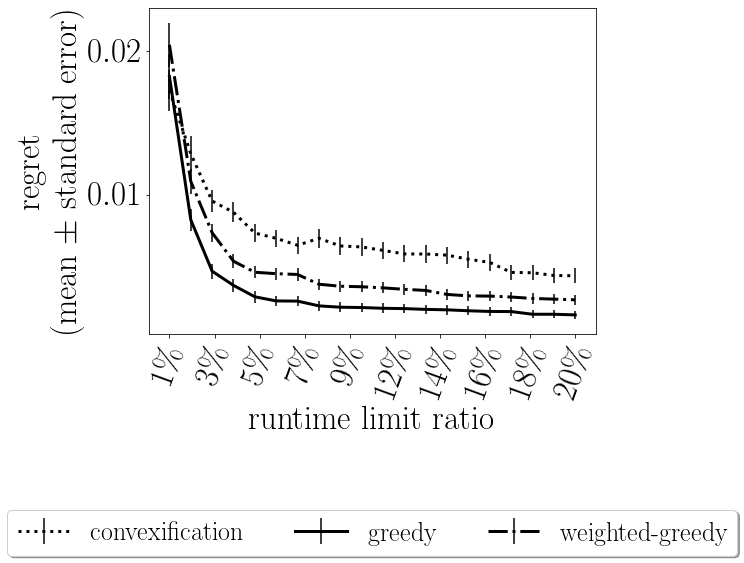

In [97]:
fontsize = 33
linewidth = 3
elinewidth = 1.5
xtick_pos = np.linspace(runtime_limits_to_plot[0], runtime_limits_to_plot[-1], 10)
colors = ['black', 'red', 'purple', 'orange', 'green', 'cyan', 'blue']

plt.figure(figsize=(8, 6))

eb1 = plt.errorbar(runtime_limits_to_plot, regrets_ed_incremental_increase_runtime_limit_mean, regrets_ed_incremental_increase_runtime_limit_ste, color=colors[0], label='convexification', ls=':', lw=linewidth, elinewidth=elinewidth)
eb2 = plt.errorbar(runtime_limits_to_plot, regrets_ed_incremental_greedy_increase_runtime_limit_mean, regrets_ed_incremental_greedy_increase_runtime_limit_ste, color=colors[0], label='greedy', ls='-', lw=linewidth, elinewidth=elinewidth)
eb3 = plt.errorbar(runtime_limits_to_plot, regrets_ed_incremental_greedy_increase_runtime_limit_with_variance_mean, regrets_ed_incremental_greedy_increase_runtime_limit_with_variance_ste, color=colors[0], ls='-.', lw=linewidth, label='weighted-greedy', elinewidth=elinewidth)

plt.xlabel('runtime limit ratio', fontsize=fontsize)
plt.ylabel('regret \n (mean $\pm$ standard error)', fontsize=fontsize)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.5), fancybox=True, shadow=True, ncol=3, fontsize=fontsize-7)

plt.xticks(xtick_pos, fontsize=fontsize, rotation=70)
plt.yticks([0, 0.01, 0.02], fontsize=fontsize)
plt.gca().xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals=0))
# plt.ylim(0, 0.055)
plt.locator_params(axis='y', nbins=8)

elapsed time and number of selected entries plot

In [48]:
sampled_indices_ed_incremental_increase_runtime_limit = <result_4>
sampled_indices_ed_incremental_greedy_increase_runtime_limit = <result_5>

sampled_indices_ed_incremental_increase_runtime_limit_mean = []
sampled_indices_ed_incremental_increase_runtime_limit_std = []
sampled_indices_ed_incremental_increase_runtime_limit_ste = []

sampled_indices_ed_incremental_greedy_increase_runtime_limit_mean = []
sampled_indices_ed_incremental_greedy_increase_runtime_limit_std = []
sampled_indices_ed_incremental_greedy_increase_runtime_limit_ste = []

runtime_limits_to_plot = []

initial_round = True

for item in sampled_indices_ed_incremental_increase_runtime_limit.columns:
    
    ed_single_runtime_limit = list(map(lambda x: len(eval(x)), list(sampled_indices_ed_incremental_increase_runtime_limit.loc[:, item])))
    sampled_indices_ed_incremental_increase_runtime_limit_mean.append(np.mean(ed_single_runtime_limit))
    sampled_indices_ed_incremental_increase_runtime_limit_std.append(np.std(ed_single_runtime_limit))
    sampled_indices_ed_incremental_increase_runtime_limit_ste.append(sem(ed_single_runtime_limit, axis=0, ddof=0))
    
    ed_greedy_single_runtime_limit = list(map(lambda x: len(eval(x)), list(sampled_indices_ed_incremental_greedy_increase_runtime_limit.loc[:, item])))
    sampled_indices_ed_incremental_greedy_increase_runtime_limit_mean.append(np.mean(ed_greedy_single_runtime_limit))
    sampled_indices_ed_incremental_greedy_increase_runtime_limit_std.append(np.std(ed_greedy_single_runtime_limit))
    sampled_indices_ed_incremental_greedy_increase_runtime_limit_ste.append(sem(ed_greedy_single_runtime_limit, axis=0, ddof=0))

    runtime_limit_ratio = [float(x) for x in re.findall(match_number, item)][0]

    runtime_limits_to_plot.append(runtime_limit_ratio)

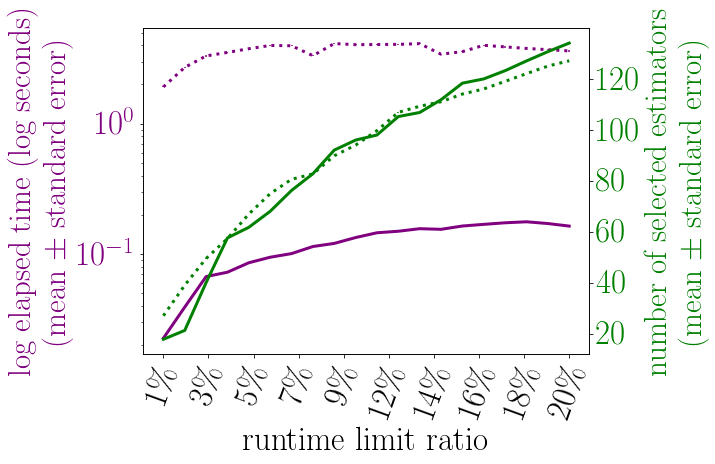

In [53]:
fontsize = 33
linewidth = 3
elinewidth = 1.5
with_error_bar = True
colors = ['purple', 'green', 'red', 'blue', 'orange', 'black', 'cyan']

fig, ax0 = plt.subplots(figsize=(8, 6))
plt.xticks(xtick_pos, fontsize=fontsize, rotation=70)

color0 = colors[0]
ax0.errorbar(runtime_limits_to_plot, elapsed_ed_incremental_increase_runtime_limit_mean, elapsed_ed_incremental_increase_runtime_limit_ste, color=color0, label='convexification', ls=':', lw=linewidth, elinewidth=elinewidth)
ax0.errorbar(runtime_limits_to_plot, elapsed_ed_incremental_greedy_increase_runtime_limit_mean, elapsed_ed_incremental_greedy_increase_runtime_limit_ste, color=color0, label='greedy', ls='-', lw=linewidth, elinewidth=elinewidth)

ax0.set_xlabel('runtime limit ratio', size=fontsize)
ax0.set_ylabel('log elapsed time (log seconds) \n (mean $\pm$ standard error)', color=color0, fontsize=fontsize-2)
ax0.set_yscale('log')

ax0.tick_params(axis='y', labelsize=fontsize, labelcolor=color0)

ax1 = ax0.twinx()
color1 = colors[1]
ax1.errorbar(runtime_limits_to_plot, sampled_indices_ed_incremental_increase_runtime_limit_mean, sampled_indices_ed_incremental_increase_runtime_limit_ste, color=color1, label='convexification', ls=':', lw=linewidth, elinewidth=elinewidth)
ax1.errorbar(runtime_limits_to_plot, sampled_indices_ed_incremental_greedy_increase_runtime_limit_mean, sampled_indices_ed_incremental_greedy_increase_runtime_limit_ste, color=color1, label='greedy', ls='-', lw=linewidth, elinewidth=elinewidth)
ax1.set_ylabel('number of selected estimators \n (mean $\pm$ standard error)', color=color1, fontsize=fontsize-2)
ax1.tick_params(axis='y', labelsize=fontsize, labelcolor=color1)
plt.gca().xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals=0))
plt.locator_params(axis='y', nbins=8)

Case 2: full error tensor

In [81]:

regrets_ed_incremental_greedy_increase_runtime_limit = <result_6>

regrets_ed_incremental_greedy_increase_runtime_limit_with_variance = <result_7>

In [82]:
regrets_ed_incremental_greedy_increase_runtime_limit_mean = []
regrets_ed_incremental_greedy_increase_runtime_limit_std = []
regrets_ed_incremental_greedy_increase_runtime_limit_ste = []

regrets_ed_incremental_greedy_increase_runtime_limit_with_variance_mean = []
regrets_ed_incremental_greedy_increase_runtime_limit_with_variance_std = []
regrets_ed_incremental_greedy_increase_runtime_limit_with_variance_ste = [] 

runtime_limits_to_plot = []

initial_round = True

for item in regrets_ed_incremental_greedy_increase_runtime_limit.columns:
    print(item)

    ed_greedy_single_runtime_limit = np.array(regrets_ed_incremental_greedy_increase_runtime_limit.loc[:, item])
    regrets_ed_incremental_greedy_increase_runtime_limit_mean.append(np.mean(ed_greedy_single_runtime_limit))
    regrets_ed_incremental_greedy_increase_runtime_limit_std.append(np.std(ed_greedy_single_runtime_limit))
    regrets_ed_incremental_greedy_increase_runtime_limit_ste.append(sem(ed_greedy_single_runtime_limit, axis=0, ddof=0))

    ed_greedy_single_runtime_limit_with_variance = np.array(regrets_ed_incremental_greedy_increase_runtime_limit_with_variance.loc[:, item])
    regrets_ed_incremental_greedy_increase_runtime_limit_with_variance_mean.append(np.mean(ed_greedy_single_runtime_limit_with_variance))
    regrets_ed_incremental_greedy_increase_runtime_limit_with_variance_std.append(np.std(ed_greedy_single_runtime_limit_with_variance))
    regrets_ed_incremental_greedy_increase_runtime_limit_with_variance_ste.append(sem(ed_greedy_single_runtime_limit_with_variance, axis=0, ddof=0))

    runtime_limit_ratio = [float(x) for x in re.findall(match_number, item)][0]

    runtime_limits_to_plot.append(runtime_limit_ratio)
    
    if runtime_limit_ratio > 0.0004:
        break

ratio 5e-05
ratio 0.0001
ratio 0.00015000000000000001
ratio 0.0002
ratio 0.00025
ratio 0.00030000000000000003
ratio 0.00035000000000000005
ratio 0.0004
ratio 0.00045000000000000004


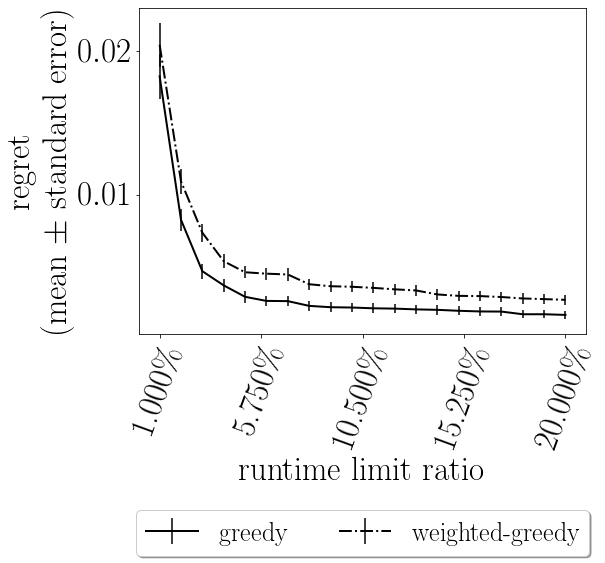

In [95]:
fontsize = 33
linewidth = 2
elinewidth = 1.5
with_error_bar = True
xtick_pos = np.linspace(runtime_limits_to_plot[0], runtime_limits_to_plot[-1], 5)
colors = ['red', 'black', 'purple', 'orange', 'green', 'cyan', 'blue']

plt.figure(figsize=(8, 6))
plt.errorbar(runtime_limits_to_plot, regrets_ed_incremental_greedy_increase_runtime_limit_mean, regrets_ed_incremental_greedy_increase_runtime_limit_ste, color=colors[1], label='greedy', ls='-', lw=linewidth, elinewidth=elinewidth)
plt.errorbar(runtime_limits_to_plot, regrets_ed_incremental_greedy_increase_runtime_limit_with_variance_mean, regrets_ed_incremental_greedy_increase_runtime_limit_with_variance_ste, color=colors[1], ls='-.', lw=linewidth, label='weighted-greedy', elinewidth=elinewidth)

plt.xlabel('runtime limit ratio', fontsize=fontsize)
plt.ylabel('regret \n (mean $\pm$ standard error)', fontsize=fontsize)

plt.xticks(xtick_pos, fontsize=fontsize, rotation=70)
plt.yticks([0, 0.01, 0.02, 0.03, 0.04], fontsize=fontsize)
plt.locator_params(axis='y', nbins=8)
plt.gca().xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals=3))

In [73]:
elapsed_ed_incremental_greedy_increase_runtime_limit = <result_8>

In [75]:
elapsed_ed_incremental_greedy_increase_runtime_limit_mean = []
elapsed_ed_incremental_greedy_increase_runtime_limit_std = []
elapsed_ed_incremental_greedy_increase_runtime_limit_ste = []

runtime_limits_to_plot = []

initial_round = True

for item in elapsed_ed_incremental_greedy_increase_runtime_limit.columns:

    ed_greedy_single_runtime_limit = np.array(elapsed_ed_incremental_greedy_increase_runtime_limit.loc[:, item])
    elapsed_ed_incremental_greedy_increase_runtime_limit_mean.append(np.mean(ed_greedy_single_runtime_limit))
    elapsed_ed_incremental_greedy_increase_runtime_limit_std.append(np.std(ed_greedy_single_runtime_limit))
    elapsed_ed_incremental_greedy_increase_runtime_limit_ste.append(sem(ed_greedy_single_runtime_limit, axis=0, ddof=0))

    runtime_limit_ratio = [float(x) for x in re.findall(match_number, item)][0]

    runtime_limits_to_plot.append(runtime_limit_ratio)
    
    if runtime_limit_ratio > 0.0004:
        break

In [77]:
sampled_indices_tensor_ed_incremental_greedy_increase_runtime_limit = <result_9>

sampled_indices_ed_incremental_greedy_increase_runtime_limit_mean = []
sampled_indices_ed_incremental_greedy_increase_runtime_limit_std = []
sampled_indices_ed_incremental_greedy_increase_runtime_limit_ste = []

runtime_limits_to_plot = []

initial_round = True

for item in sampled_indices_tensor_ed_incremental_greedy_increase_runtime_limit.columns:

    ed_greedy_single_runtime_limit = list(map(lambda x: len(eval(x)), list(sampled_indices_tensor_ed_incremental_greedy_increase_runtime_limit.loc[:, item])))
    sampled_indices_ed_incremental_greedy_increase_runtime_limit_mean.append(np.mean(ed_greedy_single_runtime_limit))
    sampled_indices_ed_incremental_greedy_increase_runtime_limit_std.append(np.std(ed_greedy_single_runtime_limit))
    sampled_indices_ed_incremental_greedy_increase_runtime_limit_ste.append(sem(ed_greedy_single_runtime_limit, axis=0, ddof=0))

    runtime_limit_ratio = [float(x) for x in re.findall(match_number, item)][0]

    runtime_limits_to_plot.append(runtime_limit_ratio)
    
    if runtime_limit_ratio > 0.0004:
        break

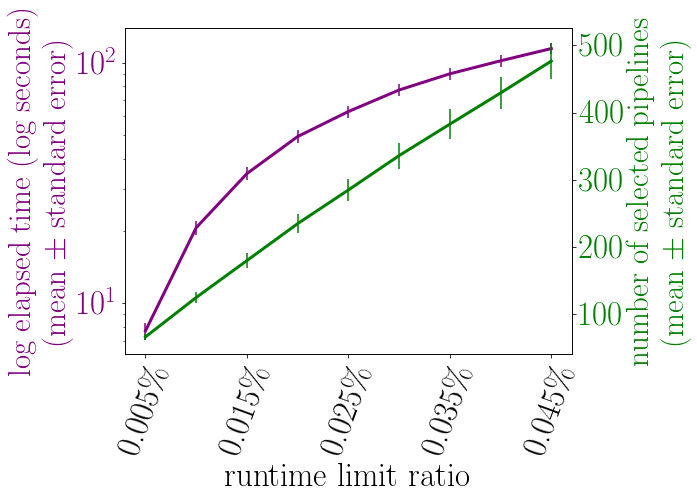

In [80]:
fontsize = 33
linewidth = 3
elinewidth = 1.5
with_error_bar = True
xtick_pos = np.linspace(runtime_limits_to_plot[0], runtime_limits_to_plot[-1], 5)
colors = ['purple', 'green', 'red', 'blue', 'orange', 'black', 'cyan']

fig, ax0 = plt.subplots(figsize=(8, 6))
plt.xticks(xtick_pos, fontsize=fontsize, rotation=70)

color0 = colors[0]
ax0.errorbar(runtime_limits_to_plot, elapsed_ed_incremental_greedy_increase_runtime_limit_mean, elapsed_ed_incremental_greedy_increase_runtime_limit_ste, color=color0, label='greedy', lw=linewidth, elinewidth=elinewidth)

ax0.set_xlabel('runtime limit ratio', size=fontsize)
ax0.set_ylabel('log elapsed time (log seconds) \n (mean $\pm$ standard error)', color=color0, fontsize=fontsize-2)
ax0.set_yscale('log')

ax0.tick_params(axis='y', labelsize=fontsize, labelcolor=color0)

ax1 = ax0.twinx()
color1 = colors[1]
ax1.errorbar(runtime_limits_to_plot, sampled_indices_ed_incremental_greedy_increase_runtime_limit_mean, sampled_indices_ed_incremental_greedy_increase_runtime_limit_ste, color=color1, label='greedy', lw=linewidth, elinewidth=elinewidth)
ax1.set_ylabel('number of selected pipelines \n (mean $\pm$ standard error)', color=color1, fontsize=fontsize-2)
ax1.tick_params(axis='y', labelsize=fontsize, labelcolor=color1)
plt.gca().xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals=3))
plt.locator_params(axis='y', nbins=8)